# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [210]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [211]:
import numpy as np
def des_matr(x0,m):
    x0 = np.array(x0)
    matr = np.array([])
    for j in range(0,m):
        matr = np.append(matr,x0**j)
    return matr.reshape((m,x0.shape[0])).T

def solve(A, y):
    return np.linalg.solve(A.T@A,A.T @ y)
matr1 = des_matr(x,3)
a = solve(matr1,y)
print(a)

[-1.25772058 -0.65313865  1.0667959 ]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [212]:
x = np.array(x)
sigma = 1
m = 0
for m in range(x.shape[0]):
    if abs(sigma - 1/(x.shape[0]- m)*np.linalg.norm(y - des_matr(x,m)@solve(des_matr(x,m),y))**2) < 1e-3 : 
        print("Stabilizing: ",m-1)
    if -(sigma - 1/(x.shape[0]- m)*np.linalg.norm(y - des_matr(x,m)@solve(des_matr(x,m),y))**2) > 0:
        print("Increasing: ", m-1)
    sigma = 1/(x.shape[0]- m)*np.linalg.norm(y - des_matr(x,m)@solve(des_matr(x,m),y))**2

Increasing:  -1
Stabilizing:  4
Increasing:  4
Stabilizing:  5
Increasing:  5
Stabilizing:  6
Increasing:  7
Stabilizing:  8
Increasing:  9
Increasing:  10
Increasing:  12
Increasing:  13


We can see, that the best polynomials is fourth.

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

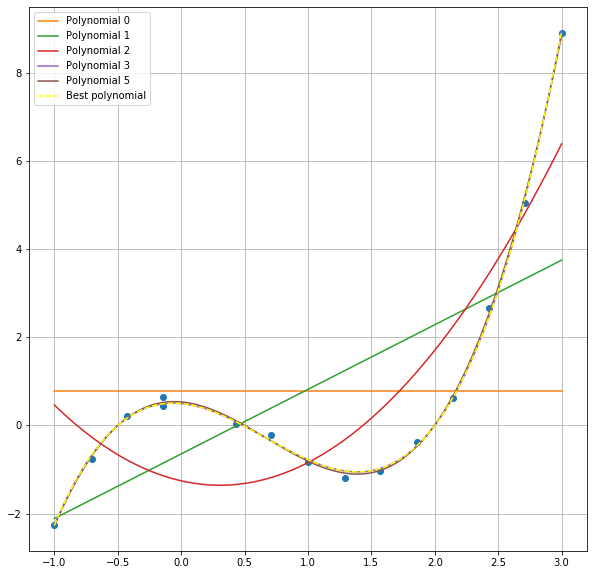

In [222]:
import matplotlib 
import matplotlib.pyplot as plt
def poly(x,a,m):
    func = np.array([])
    pol = 0
    for i in range(m):
        pol += a[i]*x**i
    func = np.append(func,pol)
    return func



x = np.array(x)
y = np.array(y)
x0 = np.linspace(x.min(), x.max(), 10**3)
plt.figure(figsize=(10, 10))
plt.plot(x, y, "o")
for m in range(1,7):
    if m != 5:
        a = solve(des_matr(x,m),y)
        plt.plot(x0, poly(x0,a,m), label = "Polynomial "+ str(m-1))
a5 = solve(des_matr(x,4),y)
plt.plot(x0, poly(x0,a5,4), color= "yellow" ,label = "Best polynomial",linestyle = 'dashed')
plt.legend()
plt.grid()
plt.show()

    


### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [214]:
def LLS2(x0,y0,m):
    Q, R = np.linalg.qr(des_matr(x0,m))
    return np.linalg.solve(R,Q.T@y0)

print(np.abs(solve(des_matr(x,4),y) - LLS2(x,y,4))) #We can see, that this are the same parameters


[2.08721929e-14 3.16413562e-15 3.68594044e-14 1.22124533e-14]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

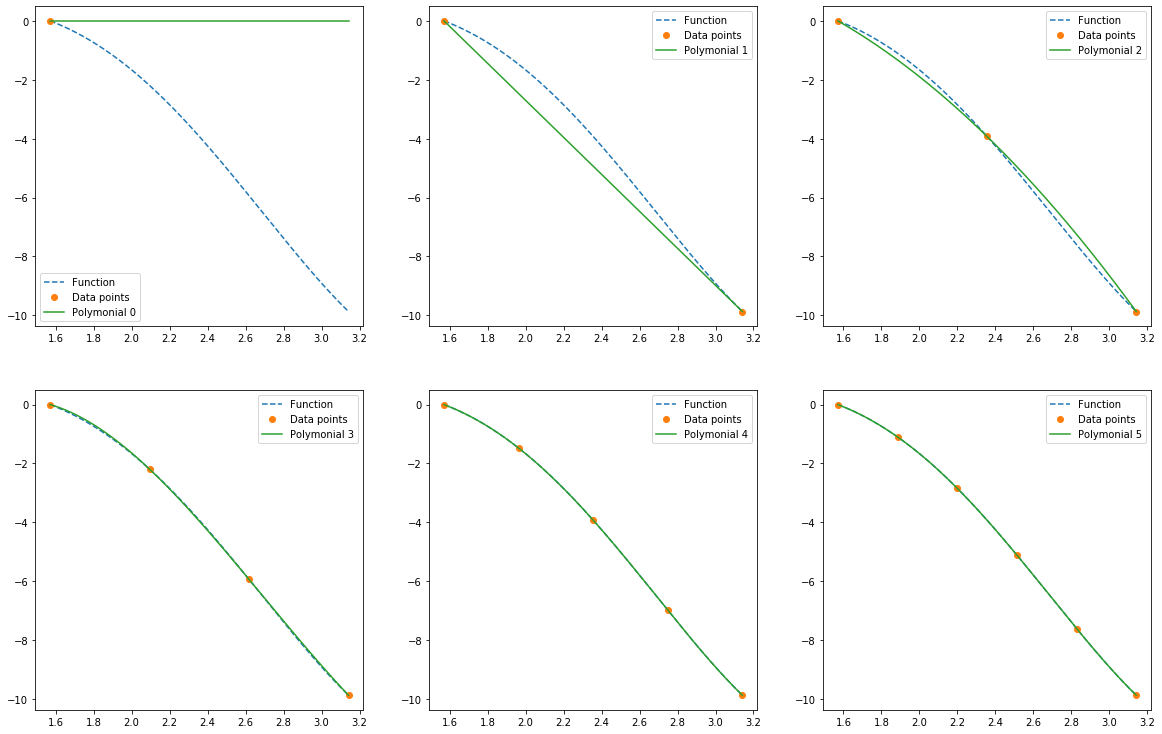

In [224]:
def func1(x):
    return x**2*np.cos(x)

def l_pol(x, x0, y0, m):
    l = np.ones_like(x)
    for j in range(x0.shape[0]):
        if (j != m):
            l *= (x-x0[j])/(x0[m]-x0[j])
    return l
def L_pol(x,x0,y0):
    L=0
    i = 0
    for i in range(x0.shape[0]):
        L += y0[i]*l_pol(x,x0,y0,i)
    return L
x_ = np.linspace(np.pi/2, np.pi, 10**3)

plt.figure(figsize=(20, 20))

for m in range(1,7):
    plt.subplot(3, 3, m)
    plt.plot(x_,func1(x_),label = 'Function', linestyle = 'dashed')
    x0_ = np.linspace(np.pi/2, np.pi, m)
    y0_ = func1(x0_)
    plt.plot(x0_,y0_, 'o',label = 'Data points')
    plt.plot(x_, L_pol(x_,x0_,y0_), label = 'Polymonial '+ str(m-1))
    plt.legend()

plt.show()


    


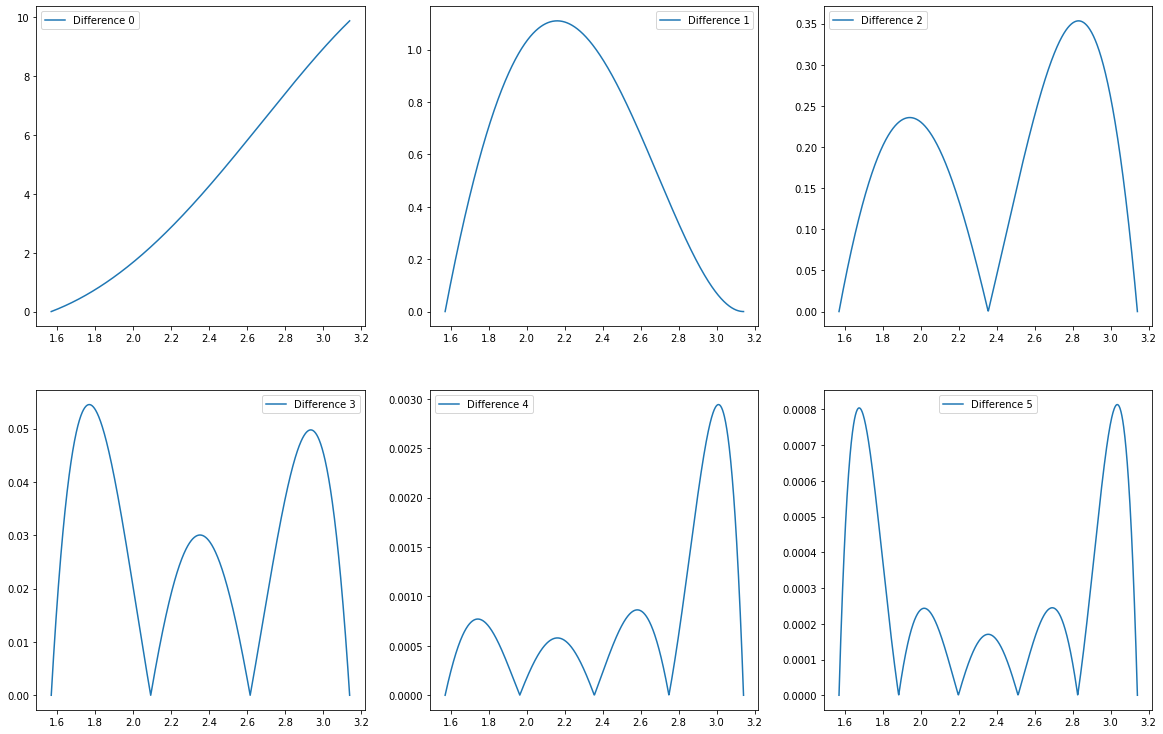

In [216]:
# difference
plt.figure(figsize=(20, 20))
for m in range(1,7):
    x0_ = np.linspace(np.pi/2, np.pi, m)
    y0_ = func1(x0_)
    plt.subplot(3, 3, m)
    plt.plot(x_, np.abs(L_pol(x_,x0_,y0_)-func1(x_)), label = 'Difference '+ str(m-1))
    plt.legend()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

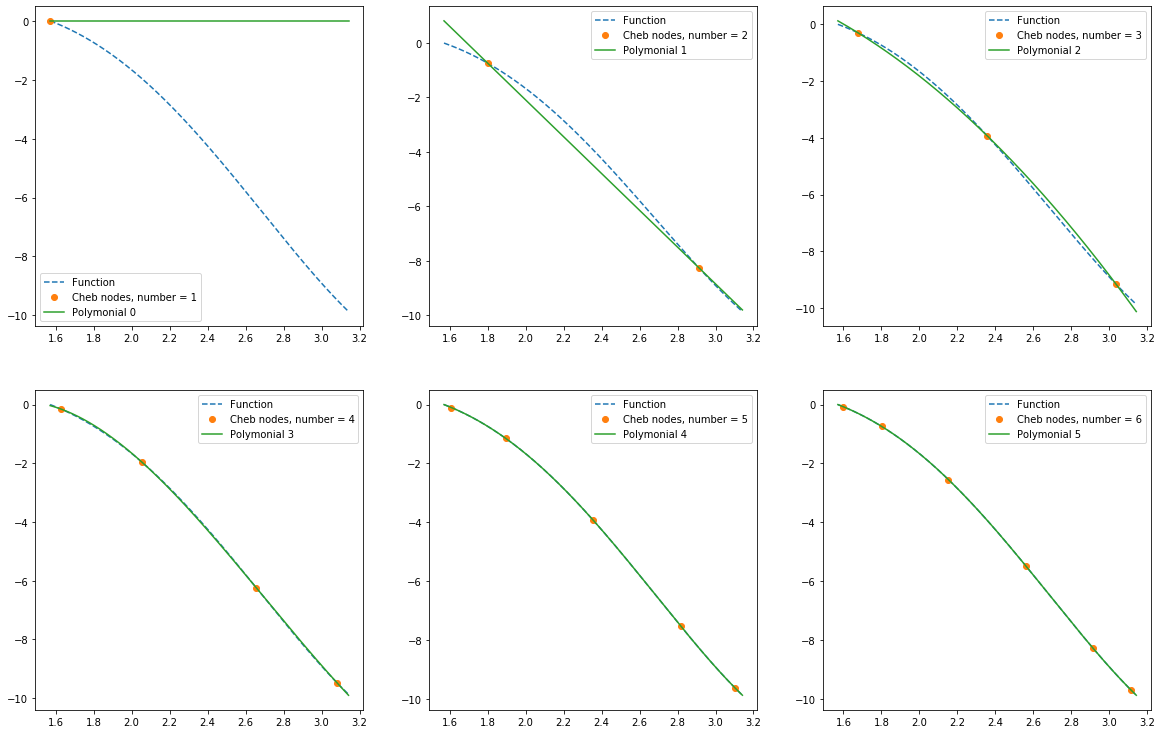

In [223]:
from numpy.polynomial.chebyshev import chebroots
plt.figure(figsize=(20, 20))
for m in range(1,7):
    x0_ = np.linspace(np.pi/2, np.pi, m)
    y0_ = func1(x0_)
    power_array_2=np.zeros(m+1)
    power_array_2[-1]=1
    cheb_roots_2=0.5*(np.max(x0_)+np.min(x0_))+0.5*(np.max(x0_)-np.min(x0_))*chebroots(power_array_2)
    plt.subplot(3, 3, m)
    plt.plot(x_,func1(x_),label = 'Function', linestyle = 'dashed')
    plt.plot(cheb_roots_2,func1(cheb_roots_2), 'o',label = 'Cheb nodes, number = '+ str(m))
    plt.plot(x_, L_pol(x_,cheb_roots_2,func1(cheb_roots_2)), label = 'Polymonial '+ str(m-1))
    plt.legend()

plt.show()
    


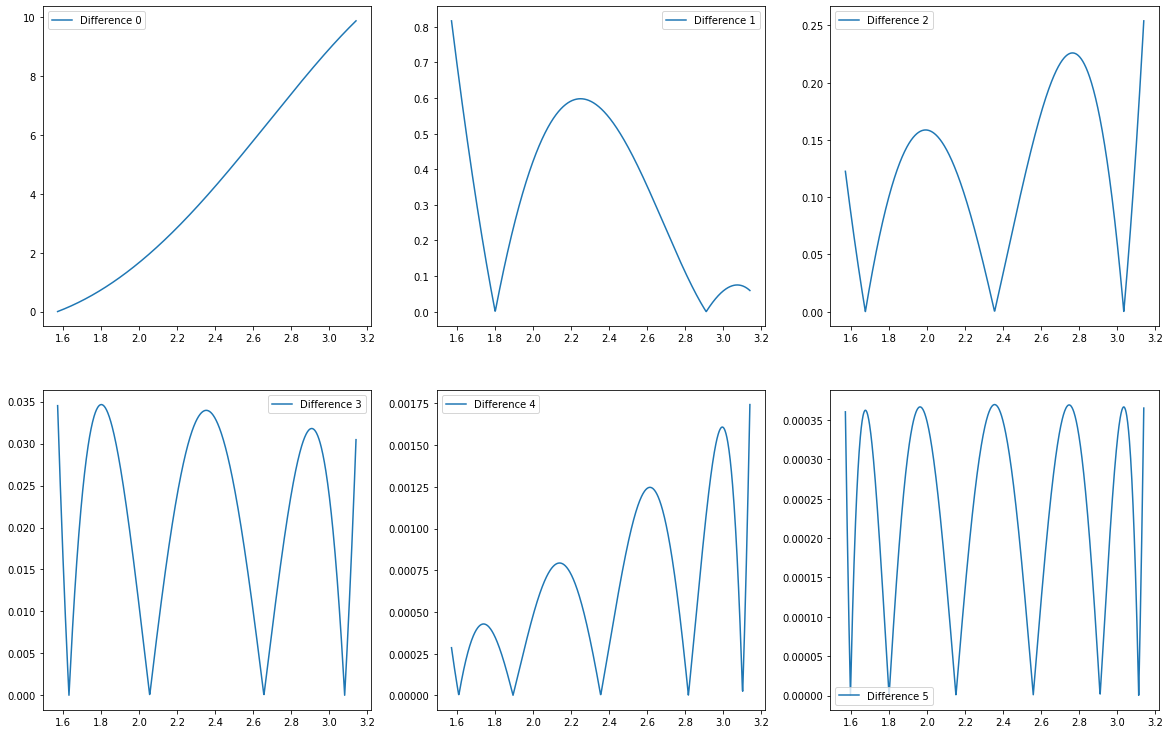

In [218]:
# cheb difference
plt.figure(figsize=(20, 20))
for m in range(1,7):
    x0_ = np.linspace(np.pi/2, np.pi, m)
    y0_ = func1(x0_)
    power_array_2=np.zeros(m+1)
    power_array_2[-1]=1
    cheb_roots_2=0.5*(np.max(x0_)+np.min(x0_))+0.5*(np.max(x0_)-np.min(x0_))*chebroots(power_array_2)
    plt.subplot(3, 3, m)
    plt.plot(x_, np.abs(L_pol(x_,cheb_roots_2,func1(cheb_roots_2))-func1(x_)), label = 'Difference '+ str(m-1))
    plt.legend()

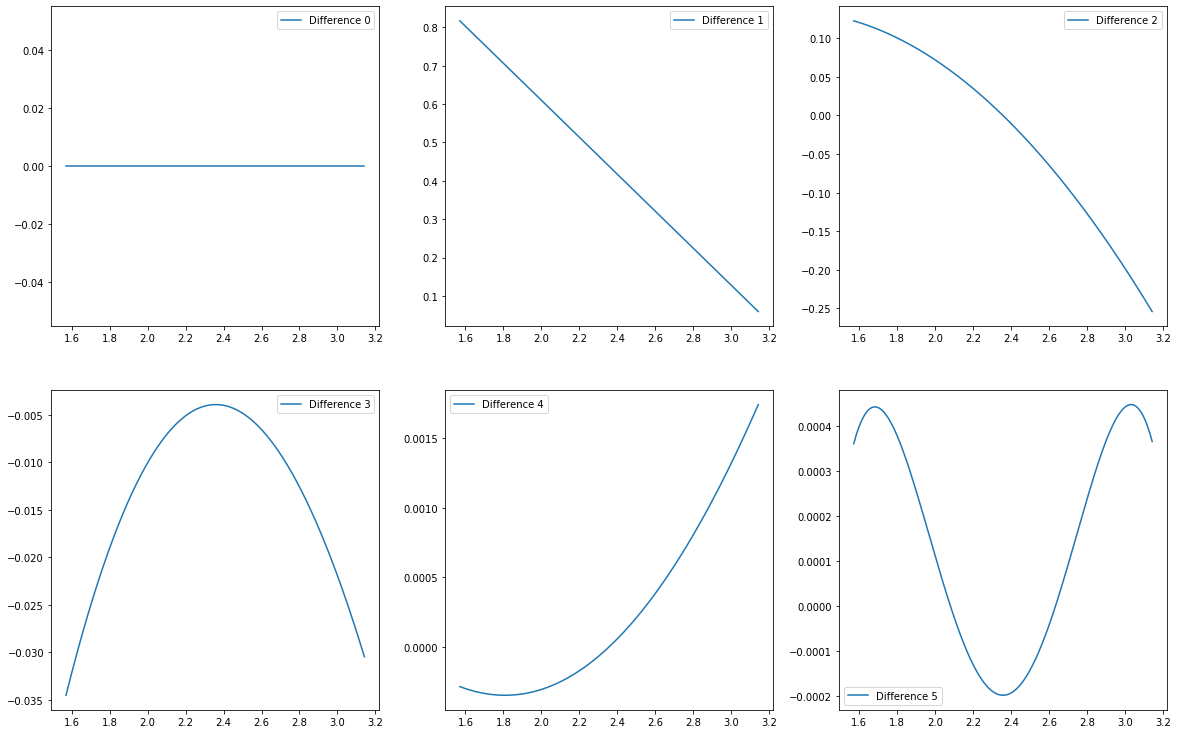

In [219]:
# difference between polymomias
plt.figure(figsize=(20, 20))
for m in range(1,7):
    x0_ = np.linspace(np.pi/2, np.pi, m)
    y0_ = func1(x0_)
    power_array_2=np.zeros(m+1)
    power_array_2[-1]=1
    cheb_roots_2=0.5*(np.max(x0_)+np.min(x0_))+0.5*(np.max(x0_)-np.min(x0_))*chebroots(power_array_2)
    plt.subplot(3, 3, m)
    plt.plot(x_, (L_pol(x_,cheb_roots_2,func1(cheb_roots_2))-L_pol(x_,x0_,y0_)), label = 'Difference '+ str(m-1))
    plt.legend()